<a href="https://colab.research.google.com/github/akansha55/PRISM/blob/master/CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from mpl_toolkits.mplot3d import Axes3D


import os
data = pd.read_csv("ethylene_CO.csv")
data.describe()

print(data.head(20))

print(data.info())

    Time (seconds)  CO conc(ppm)  ...  TGS2620.2  TGS2620.3
0             0.00           0.0  ...    7650.61    6928.42
1             0.01           0.0  ...    7498.79    6800.66
2             0.01           0.0  ...    7369.67    6697.47
3             0.03           0.0  ...    7285.13    6578.52
4             0.04           0.0  ...    7156.74    6468.32
5             0.05           0.0  ...    7067.61    6385.31
6             0.06           0.0  ...    6976.13    6300.97
7             0.07           0.0  ...    6900.01    6248.81
8             0.07           0.0  ...    6827.34    6183.33
9             0.09           0.0  ...    6789.64    6101.90
10            0.10           0.0  ...    6674.81    6020.02
11            0.10           0.0  ...    6611.69    5980.02
12            0.12           0.0  ...    6545.93    5898.56
13            0.12           0.0  ...    6495.29    5864.49
14            0.14           0.0  ...    6417.71    5815.49
15            0.14           0.0  ...   

(array([66692., 10000.]),
 array([  0.   , 266.665, 533.33 ]),
 <a list of 2 Patch objects>)

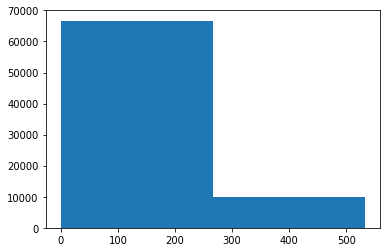

In [ ]:
plt.hist(data["CO conc(ppm)"], bins=2)
#plt.show()

In [ ]:

#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

csv_file = pd.read_csv("/ethylene_CO.csv")
csv_file.drop(columns= ['Ethylene conc(ppm)','TGS2600','TGS2602','TGS2610','TGS2620'],inplace=True)
print(csv_file.columns)
#viewing few rows from the top
csv_file.head()

#number of rows and columns in the dataset
csv_file.shape

#statistical information about columns
csv_file.describe
#checking how many null values are in each column
csv_file.isnull().sum()
# dropping all the rows with NaN values
csv_file = csv_file.dropna()


Index(['Time (seconds)', 'CO conc(ppm)', 'TGS2602.1', 'TGS2600.1', ' TGS2610',
       ' TGS2610.1', 'TGS2620.1', 'TGS2602.2', 'TGS2602.3', 'TGS2600.2',
       'TGS2600.3', 'TGS2610.1', 'TGS2620.2', 'TGS2620.3'],
      dtype='object')


In [ ]:

#defining training and testing data
x_train = csv_file[:24865]
y_train = x_train['TGS2602.1']
x_test = csv_file[24865:31898]
y_test = x_test['TGS2602.1']
print(y_test)

24865    4765.68
24866    4754.69
24867    4764.97
24868    4787.72
24869    4758.94
          ...   
31893    3750.20
31894    3748.35
31895    3749.58
31896    3751.12
31897    3755.12
Name: TGS2602.1, Length: 7033, dtype: float64


In [ ]:
csv_file.loc[24865:31898].count() / csv_file.shape[0] * 100

Time (seconds)    2.629719
CO conc(ppm)      2.629719
TGS2602.1         2.629719
TGS2600.1         2.629719
 TGS2610          2.629719
 TGS2610.1        2.629719
TGS2620.1         2.629719
TGS2602.2         2.629719
TGS2602.3         2.629719
TGS2600.2         2.629719
TGS2600.3         2.629719
TGS2610.1         2.629719
TGS2620.2         2.629719
TGS2620.3         2.629719
dtype: float64

In [ ]:
#Normalizing training data
train_norm = x_train['TGS2602.1']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.00441521]
[0.00387684]
[0.00228881]
[0.00311892]
[0.00158202]


In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  14865


In [ ]:
#removing null values 
train_norm = train_norm[train_norm!=0]

In [ ]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['TGS2602.1']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.97920048]
[0.96882904]
[0.97853044]
[1.]
[0.97283983]


In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1 
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  7033


In [ ]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(10000,)
(0,)


In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [ ]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=1.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True) #good

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1019 - accuracy: 0.8496 - val_loss: 0.0417 - val_accuracy: 2.8450e-04
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 4.6430e-15 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 2.8450e-04
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2211e-16 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 2.8450e-04
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2211e-16 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 2.8450e-04
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 2.0328e-16 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 2.8450e-04
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 2.8450e-04
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[[0.97920048]
 [0.96882904]
 [0.97853044]] [1.]
[[0.96882904]
 [0.97853044]
 [1.        ]] [0.97283983]
[[0.97853044]
 [1.        ]
 [0.97283983]] [0.97016911]
[[1.        ]
 [0.97283983]
 [0.97016911]] [0.96013741]
[[0.97283983]
 [0.97016911]
 [0.96013741]] [0.96548828]


In [ ]:

print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

[0.9788262]
[0.9829344]
[0.9862897]
[0.9852912]
[0.97283643]


In [ ]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.04169


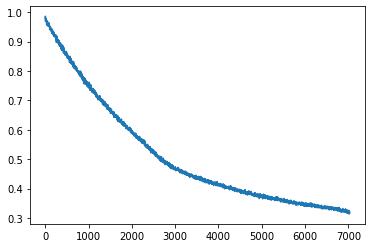

In [ ]:
plt.plot(yhat)

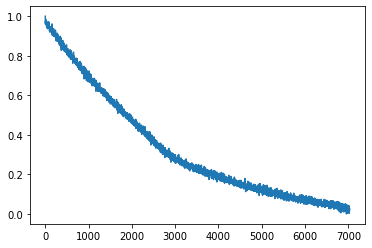

In [ ]:
plt.plot(y_split_test)

In [ ]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 1.00000, Test: 0.00028


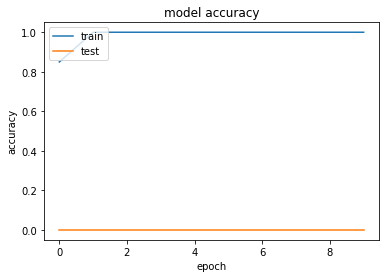

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

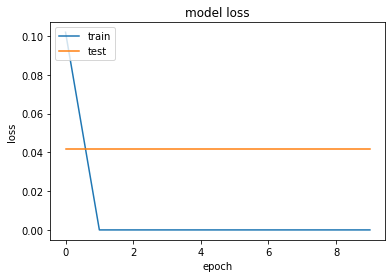

In [ ]:

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def compute(var):
    train_norm = x_train[var] 
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]
    
    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)
    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
777/777 [==============================] - 2s 3ms/step - loss: 4.4757e-04 - accuracy: 4.0224e-05 - val_loss: 9.1762e-05 - val_accuracy: 1.4227e-04
Epoch 2/10
777/777 [==============================] - 2s 3ms/step - loss: 3.2882e-06 - accuracy: 4.0224e-05 - val_loss: 9.1378e-05 - val_accuracy: 1.4227e-04
Epoch 3/10
777/777 [==============================] - 2s 3ms/step - loss: 2.9832e-06 - accuracy: 4.0224e-05 - val_loss: 9.1586e-05 - val_accuracy: 1.4227e-04
Epoch 4/10
777/777 [==============================] - 2s 3ms/step - loss: 2.8892e-06 - accuracy: 4.0224e-05 - val_loss: 9.2920e-05 - val_accuracy: 1.4227e-04
Epoch 5/10
777/777 [==============================] - 3s 3ms/step - loss: 2.9148e-06 - accuracy: 4.0224e-05 - val_loss: 9.3103e-05 - val_accuracy: 1.4227e-04
Epoch 6/10
777/777 [==============================] - 3s 3ms/step - loss: 3.1529e-06 - accuracy: 4.0224e-05 - val_loss: 9.1591e-05 - val_accuracy: 1.4227e-04
Epoch 7/10
777/777 [==============================] 

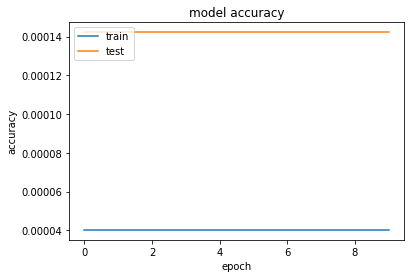

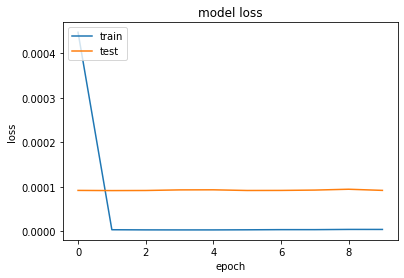

In [ ]:
compute('TGS2602.1')

Epoch 1/10
777/777 [==============================] - 3s 3ms/step - loss: 7.3600e-06 - accuracy: 0.0000e+00 - val_loss: 1.6445e-04 - val_accuracy: 2.8454e-04
Epoch 2/10
777/777 [==============================] - 3s 3ms/step - loss: 4.9384e-06 - accuracy: 0.0000e+00 - val_loss: 1.5486e-04 - val_accuracy: 2.8454e-04
Epoch 3/10
777/777 [==============================] - 2s 3ms/step - loss: 4.8023e-06 - accuracy: 0.0000e+00 - val_loss: 1.4835e-04 - val_accuracy: 2.8454e-04
Epoch 4/10
777/777 [==============================] - 3s 4ms/step - loss: 4.5321e-06 - accuracy: 0.0000e+00 - val_loss: 1.5505e-04 - val_accuracy: 2.8454e-04
Epoch 5/10
777/777 [==============================] - 3s 3ms/step - loss: 4.8663e-06 - accuracy: 0.0000e+00 - val_loss: 1.7330e-04 - val_accuracy: 2.8454e-04
Epoch 6/10
777/777 [==============================] - 3s 3ms/step - loss: 4.4694e-06 - accuracy: 0.0000e+00 - val_loss: 1.7205e-04 - val_accuracy: 2.8454e-04
Epoch 7/10
777/777 [==============================] 

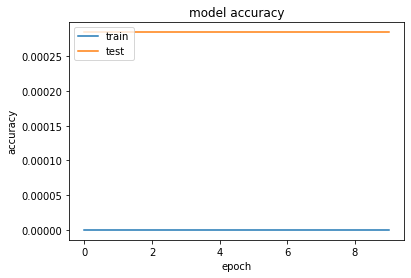

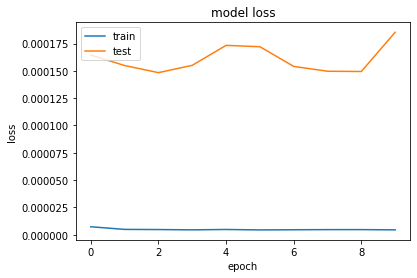

In [ ]:
compute('TGS2620.2')
# csv_file

Epoch 1/10
777/777 [==============================] - 3s 3ms/step - loss: 7.8900e-06 - accuracy: 4.0224e-05 - val_loss: 7.1746e-05 - val_accuracy: 1.4227e-04
Epoch 2/10
777/777 [==============================] - 2s 3ms/step - loss: 4.3587e-06 - accuracy: 4.0224e-05 - val_loss: 7.4680e-05 - val_accuracy: 1.4227e-04
Epoch 3/10
777/777 [==============================] - 2s 3ms/step - loss: 4.0527e-06 - accuracy: 4.0224e-05 - val_loss: 7.5281e-05 - val_accuracy: 1.4227e-04
Epoch 4/10
777/777 [==============================] - 3s 3ms/step - loss: 4.6036e-06 - accuracy: 4.0224e-05 - val_loss: 7.0338e-05 - val_accuracy: 1.4227e-04
Epoch 5/10
777/777 [==============================] - 3s 3ms/step - loss: 4.2003e-06 - accuracy: 4.0224e-05 - val_loss: 7.1802e-05 - val_accuracy: 1.4227e-04
Epoch 6/10
777/777 [==============================] - 3s 3ms/step - loss: 4.1652e-06 - accuracy: 4.0224e-05 - val_loss: 7.0710e-05 - val_accuracy: 1.4227e-04
Epoch 7/10
777/777 [==============================] 

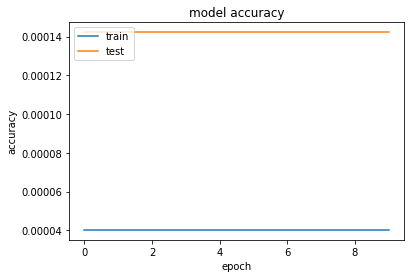

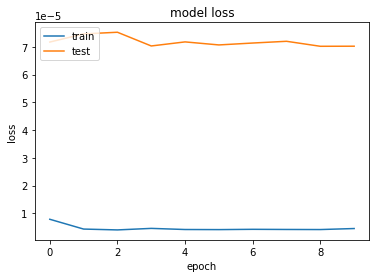

In [ ]:
compute('TGS2600.1')

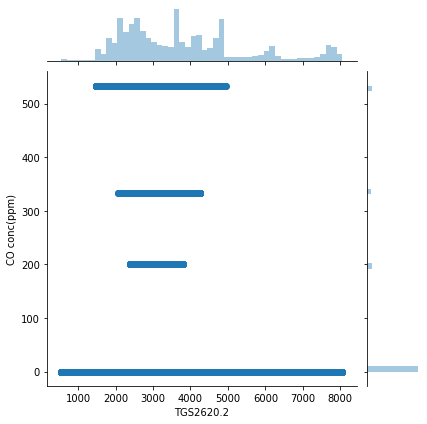

In [ ]:
sns.jointplot(x=csv_file['TGS2620.2'], y=csv_file['CO conc(ppm)'], data = csv_file)

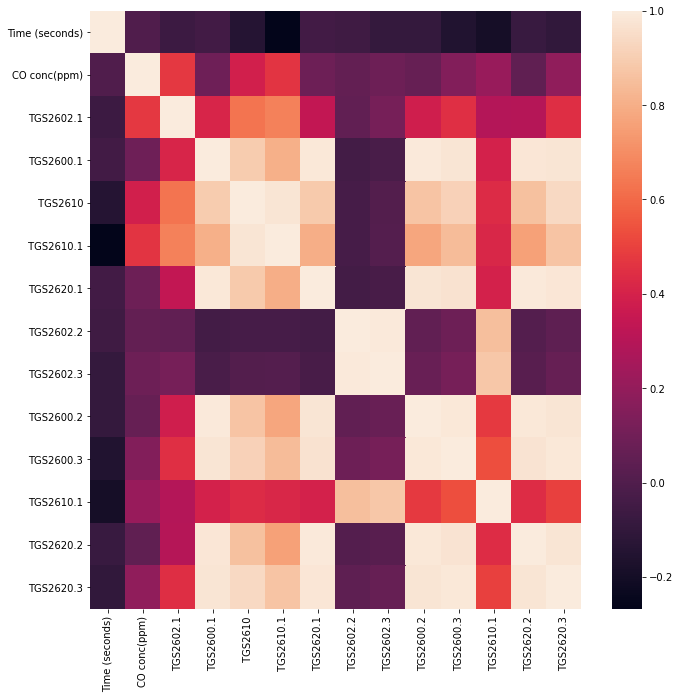

In [ ]:
corrmat = csv_file.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

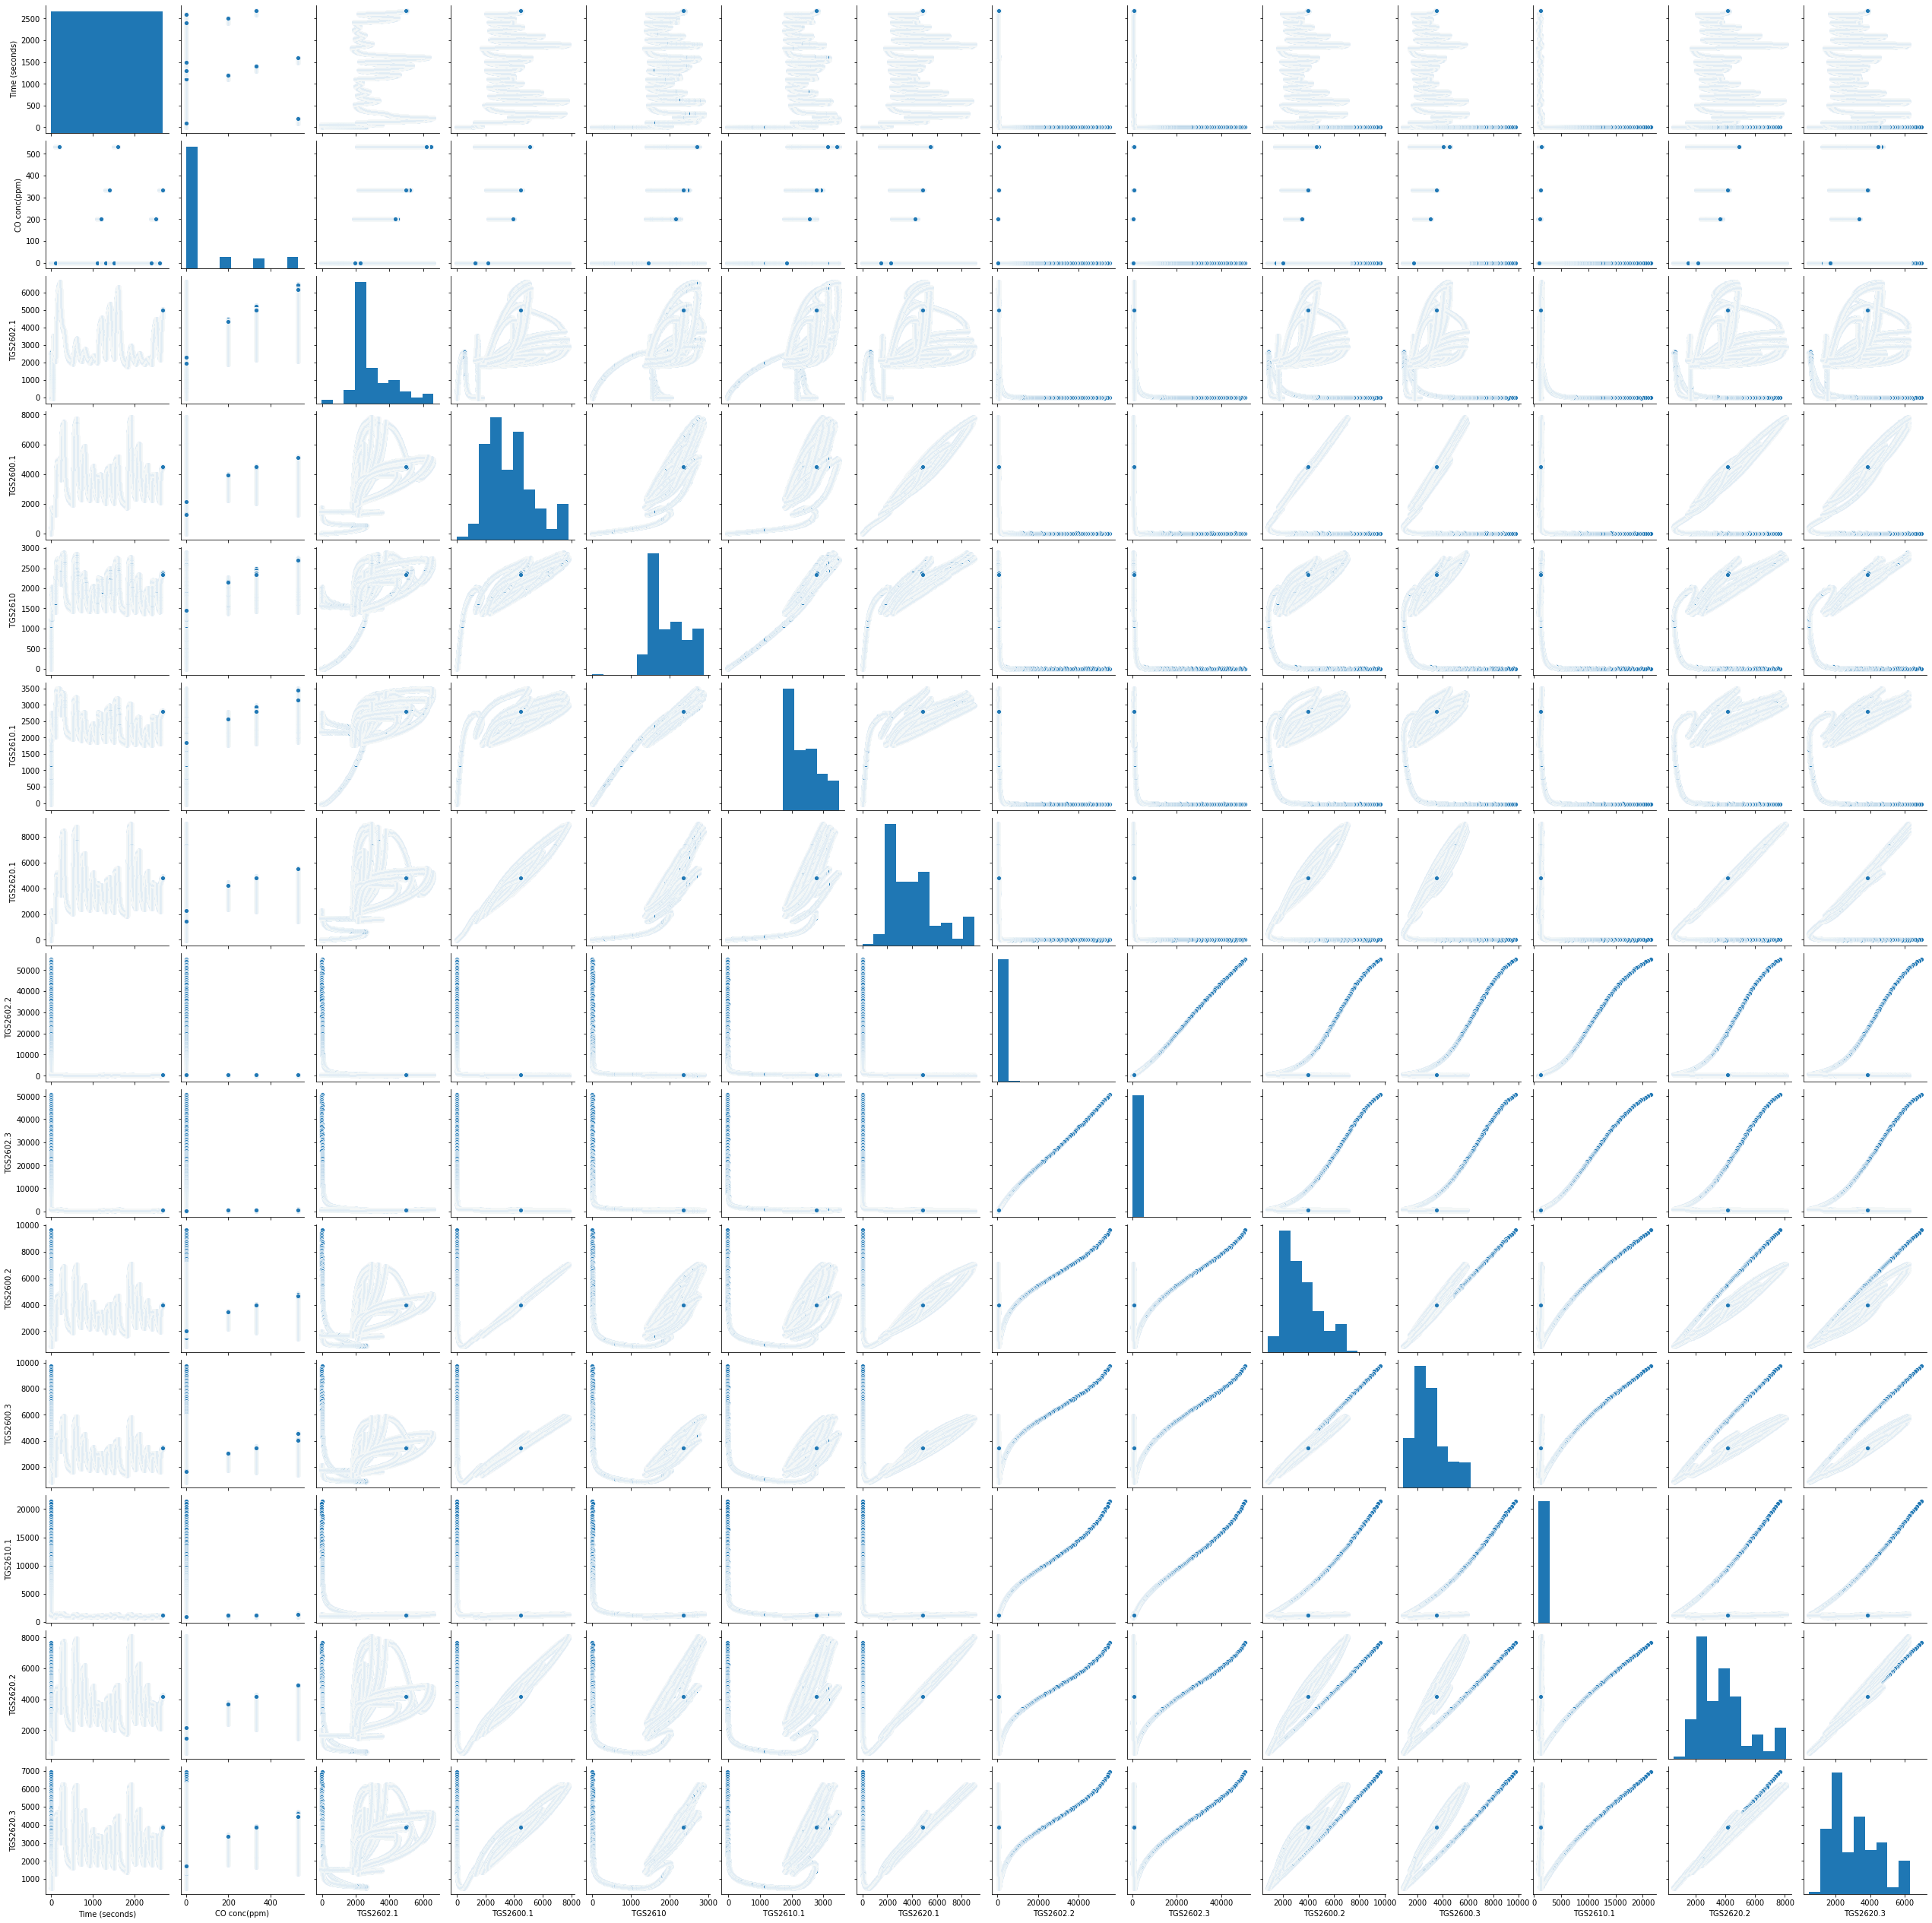

In [ ]:
g = sns.pairplot(csv_file)

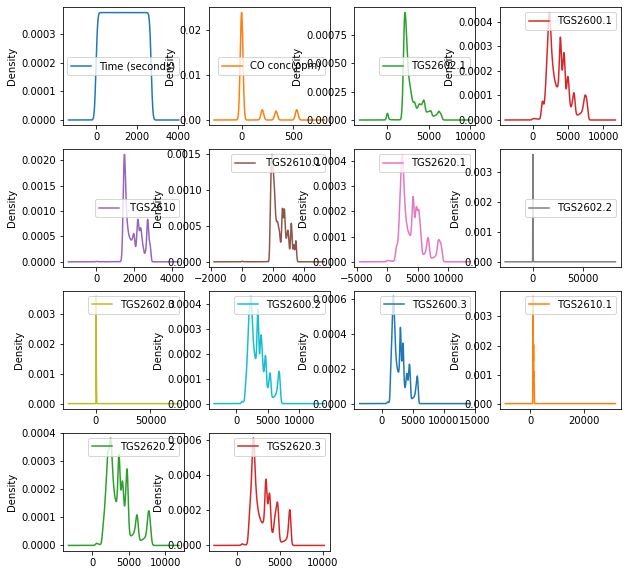

In [ ]:

csv_file.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

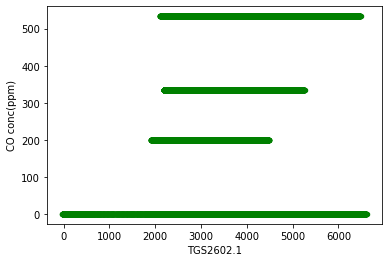

In [ ]:
 csv_file.plot.scatter(x='TGS2602.1', y='CO conc(ppm)', c='green')
# csv_file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

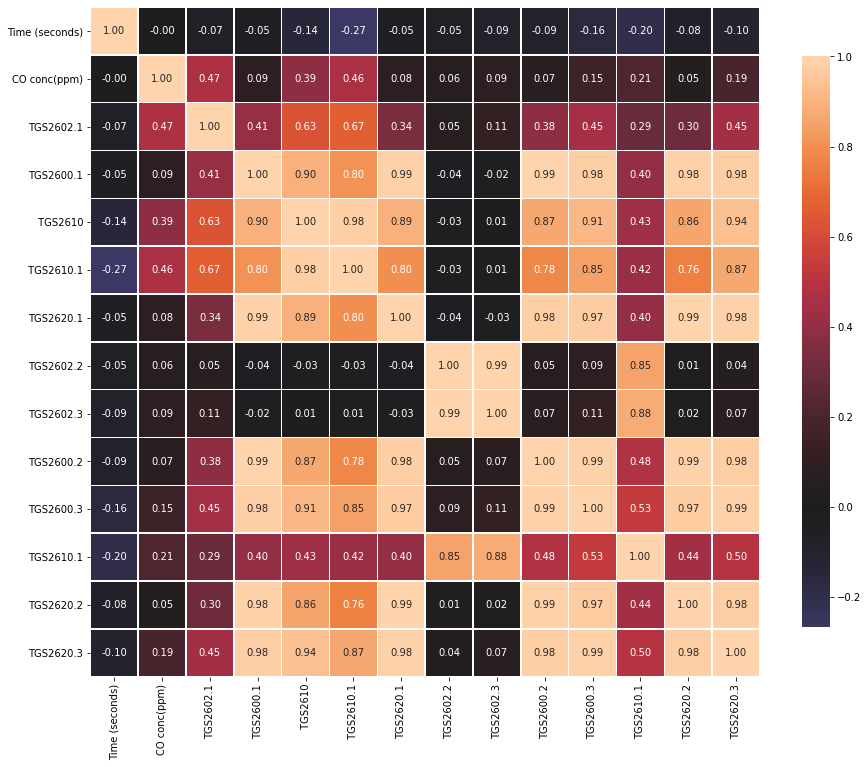

In [ ]:
correlations = csv_file.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

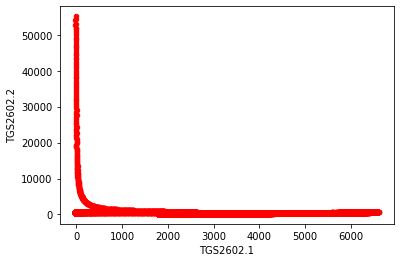

In [ ]:
csv_file.plot.scatter(x='TGS2602.1', y='TGS2602.2', c='red')